In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
len(pumpkins)

415

In [3]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [4]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [5]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
price[:5], month[:5]

(70    15.0
 71    18.0
 72    18.0
 73    17.0
 74    15.0
 dtype: float64,
 Int64Index([9, 9, 10, 10, 10], dtype='int64', name='Date'))

In [6]:
new_pumpkins = pd.DataFrame({
    'Month': month, 'Package': pumpkins['Package'],
    'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'],
    'Price': price,
})


In [7]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

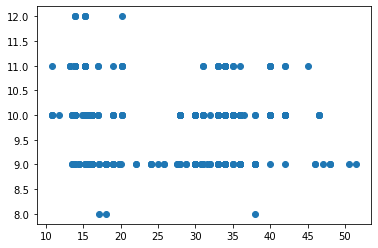

In [8]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

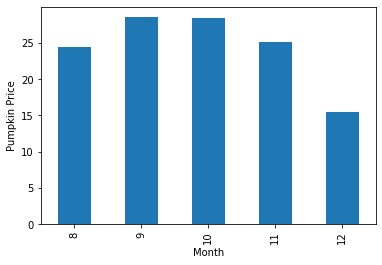

In [9]:
new_pumpkins.groupby('Month').Price.mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

## Seaborn
[Exploring Seaborn Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html#Exploring-Seaborn-Plots)

>The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting. <...> all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

<AxesSubplot:xlabel='Month', ylabel='Price'>

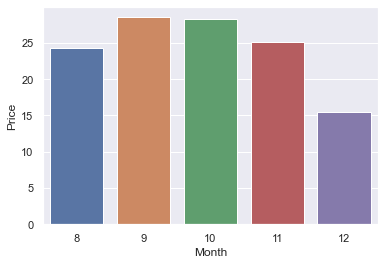

In [23]:
import seaborn as sns
sns.set_theme()  # affects all matplotlib and seaborn plots
# reset_index converts Month to column
s_df = new_pumpkins.groupby('Month').Price.mean().reset_index()
sns.barplot(x='Month', y='Price', data=s_df)